<a href="https://colab.research.google.com/github/benard3360-star/hello-world/blob/main/Time_Series_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Components of Time Series</li>
        <li>White Noise</li>
        <ol>
            <li><a href="https://#about_dataset">Modeling a White Noise</a></li>
        </ol>
        <li>Stationarity</li>
        <ol>
            <li><a href="https://#about_dataset">Model Information</a></li>
        </ol>
        <li>Random Walk </li>
          <ol>
            <li><a href="https://#about_dataset">Convert the Random Walk to a stationary time series</a></li>
            <li><a href="https://#about_dataset">Definitions of ACF and PACF</a></li>
        </ol>
        <li>Real Time Data</li>
            <ol>
            <li><a href="https://#about_dataset">Introducrion</a></li>
            <li><a href="https://#about_dataset">Statistical Summary of the Stock Data</a></li>
            <li><a href="https://#about_dataset">Bar charts Interpretation</a></li>
            <li><a href="https://#about_dataset">Check for Stationarity</a></li>
            <li><a href="https://#about_dataset">Collelogram</a></li>
            <li><a href="https://#about_dataset">Train the Model</a></li>
        </ol>
        <li>Trading Strategies</li>
            <ol>
            <li><a href="https://#about_dataset">Daily Return</a></li>
            <li><a href="https://#about_dataset">Simple Moving Average (SMA)</a></li>
            <li><a href="https://#about_dataset">Exponential Moving Average (EMA)</a></li>
            <li><a href="https://#about_dataset">Average Directional Movement Index (ADX)</a></li>
            <li><a href="https://#about_dataset">Relative Strength Index</a></li>
            <li><a href="https://#about_dataset">Volume Weighted Average Price (VWAP)</a></li>
        </ol>
        <li>Conclussion</li>
    </ul>
</div>
<br>
<hr>


## **Components of Time Series**

$$ \text{Time Series = Signal + Noise} $$

Where,

- $\text{Signal}$ is of interest and we would want to study it, and possibly, predict it.
- $\text{Noise}$ is just random noise and simply not predictable.

We can further decompose $\text{Signal}$ into the following components:

$$ \text{Signal = Trend + Seasonality + Cyclicality} $$

Where,

- $\text{Trend}$ is the long-term movement in a time series.
- $\text{Seasonality}$ is the effect caused periodically.
- $\text{Cyclicality}$ is a repeating pattern that occurs in irregular cycles.

## **White Noise**

White Noise is a special time series which does not follow any pattern. It has the following peculiarities:

- Constant mean of zero
- Constant variance
- Absence of autocorrelation


A time series model $\epsilon_{1:N}$ which is weakly stationary with:

$$
\mathbb{E}[\epsilon_n] = 0
$$

and

$$
\text{Cov}(\epsilon_m, \epsilon_n) =
\begin{cases}
\sigma^2, & \text{if } m = n, \\
0, & \text{if } m \neq n,
\end{cases}
$$

is said to be a **white noise** with variance $\sigma^2$.


### Modeling a White Noise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Simulate white noise
np.random.seed(0)
n = 1000
white_noise = np.random.normal(0, 1, n)

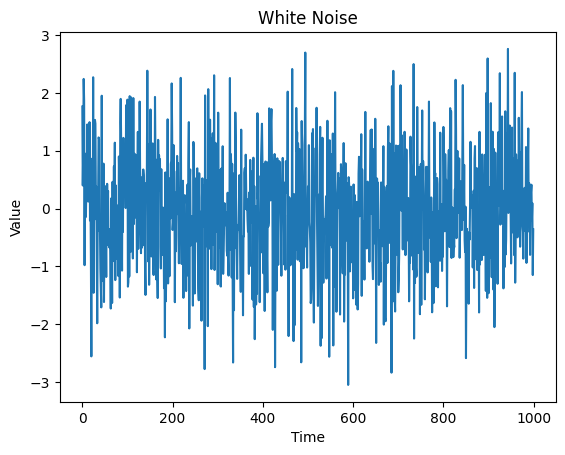

In [ ]:
# Plot the white noise
plt.plot(white_noise)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('White Noise')
plt.show()


In [ ]:
# Compute mean and standard deivation of white noise
mean = np.mean(white_noise)
std = np.std(white_noise)
print('Mean of white noise: ', mean)
print('Standard deviation of white noise: ', std)

Mean of white noise:  -0.045256707490195384
Standard deviation of white noise:  0.9870331586690257


In [ ]:
# import libraries for plotting the ACF and Pacf of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera

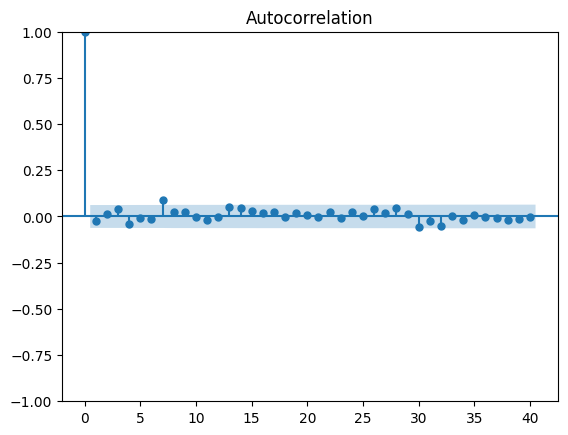

In [ ]:
# Plot autocorrelation function of white noise
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(white_noise, lags=40)
plt.show()

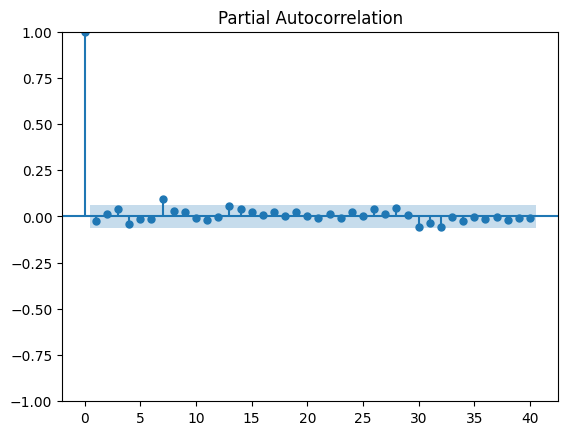

In [ ]:
# plot the pacf of the white noise
plot_pacf(white_noise, lags=40)
plt.show()

## Stationarity
Let's use Augmented Dickey Fuller test to check whether a white noise is stationary or not. It is shown below:

In [ ]:
# Do adifuller test to test for stationarity in the white noise
from statsmodels.tsa.stattools import adfuller
result = adfuller(white_noise) # This line defines 'result'
t_statistic, p_value, critical_value = round(result[0], 4), round(result[1], 4), round(result[4]['1%'], 4) # Now, 'result' can be used
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Access the critical values from the result dictionary
print('Critical Values:', result[4])

ADF Statistic: -32.462559
p-value: 0.000000
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}


Then now do a code to verify whether from the results, the time series is stationary or not.

In [ ]:
# Determine whether a given time series is stationary or not
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

The time series is stationary.


In [ ]:
# plot AR(3)MA(3)
model = ARIMA(white_noise, order=(3,0,3))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1400.654
Date:                Wed, 05 Feb 2025   AIC                           2817.307
Time:                        07:57:55   BIC                           2856.569
Sample:                             0   HQIC                          2832.229
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0452      0.032     -1.393      0.164      -0.109       0.018
ar.L1         -0.2812      0.141     -2.001      0.045      -0.557      -0.006
ar.L2         -0.2295      0.135     -1.706      0.0

### Model Information
- **Model:** ARIMA(3, 0, 3)
  - 3 autoregressive (AR) terms
  - 0 differences (no differencing was applied)
  - 3 moving average (MA) terms
- **Log Likelihood:** -1400.654 (higher values indicate better fit, though comparisons must be relative).
- **AIC (Akaike Information Criterion):** 2817.307
- **BIC (Bayesian Information Criterion):** 2856.569  
  - AIC and BIC are used for model comparison; lower values indicate a better tradeoff between model complexity and fit.

---

# Parameter Estimates
Each parameter includes:
- **`coef`:** The estimated coefficient.
- **`std err`:** The standard error of the coefficient.
- **`z`:** The z-statistic (\( \text{coef} / \text{std err} \)).
- **`P>|z|`:** The p-value for the hypothesis test that the coefficient is zero.
  - \( P < 0.05 \): Significant.
  - \( P \geq 0.05 \): Not significant.
- **`[0.025, 0.975]`:** The 95% confidence interval for the coefficient.

### Key Insights:
- **AR terms (ar.L1, ar.L2, ar.L3):**
  - AR.L1 and AR.L3 are statistically significant (\( P < 0.05 \)), meaning they contribute meaningfully to the model.
  - AR.L2 is not significant (\( P = 0.088 \)).
- **MA terms (ma.L1, ma.L2, ma.L3):**
  - All three MA terms are statistically significant (\( P < 0.05 \)).
- **Constant (`const`):**
  - Not significant (\( P = 0.164 \)), suggesting the mean of the series is close to zero or doesn’t add much information.
- **Sigma²:** The variance of the residuals, estimated as 0.964.

---

# Model Diagnostics
- **Ljung-Box Test (Q):** Tests for residual autocorrelation.
  - \( \text{Prob(Q)} = 0.45 \): No significant autocorrelation in the residuals.
- **Jarque-Bera (JB):** Tests for normality of residuals.
  - \( \text{Prob(JB)} = 0.80 \): Residuals appear to be normally distributed.
- **Heteroskedasticity (H):** Tests for constant variance in residuals.
  - \( \text{Prob(H)} = 0.98 \): No significant heteroskedasticity detected.

---

# Conclusion
1. **Goodness of Fit:**
   - The model is reasonably well-specified, with no significant residual autocorrelation, normal residuals, and constant variance.
2. **Significant Terms:**
   - AR.L1, AR.L3, and all MA terms are significant contributors.
   - AR.L2 and the constant term are not statistically significant.
3. **Potential Improvements:**
   - Simplify the model by removing non-significant terms (e.g., AR.L2, constant) and reassess performance.
4. **Practical Use:**
   - The model can likely capture the time series dynamics effectively, but further validation (e.g., out-of-sample testing) is recommended.


## Random Walk
####Correlogram
*   The autocorrelation of a random walk (which is also time-dependent) can be derived as follows:
$$
\rho_k(t) = \frac{\text{Cov}(x_t, x_{t+k})}{\sqrt{\text{Var}(x_t)\text{Var}(x_{t+k})}}
= \frac{t\sigma^2}{\sqrt{t\sigma^2(t + k)\sigma^2}}
= \frac{1}{\sqrt{1 + \frac{k}{t}}}
$$


*   This implies if we are considering a long time series, with short term lags, then we get an autocorrelation that is almost unity. That is, we have extremely high autocorrelation that does not decrease very rapidly as the lag increases.


In [ ]:
# seed a random walk
# Set the random seed
np.random.seed(4)

# Generate white noise
w = np.random.normal(size=1000)

# Initialize the random walk
x = np.zeros(1000)
x[0] = w[0]

# Create the random walk
for t in range(1, 1000):
    x[t] = x[t-1] + w[t]

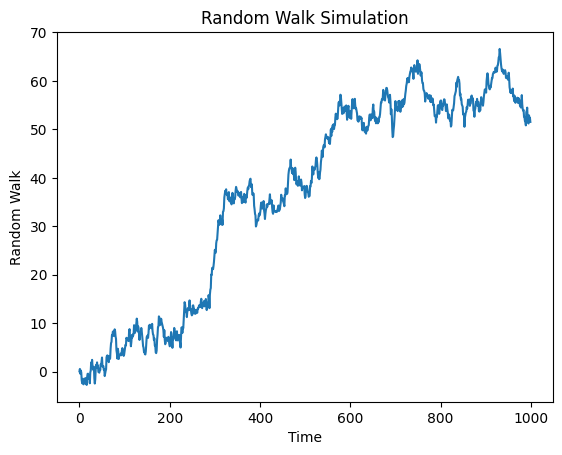

In [ ]:
import matplotlib.pyplot as plt
# Plot the random walk
plt.plot(x, linestyle="solid") # Change 'type="l"' to 'linestyle="solid"' for a solid line
plt.xlabel("Time")
plt.ylabel("Random Walk")
plt.title("Random Walk Simulation")
plt.show()

### Convert the Random Walk to a atationary time series

*   By doing differencing the series, $$\nabla X_x = X_x - X_{x-1}$$, the Random walk series becomes stationary.
*   This is the same as taking Today's price less Yesterday's price in trading,

In [ ]:
# Differenciate the random walk to make it stationary
x_diff = np.diff(x)


Text(0.5, 1.0, 'Random Walk Residuals')

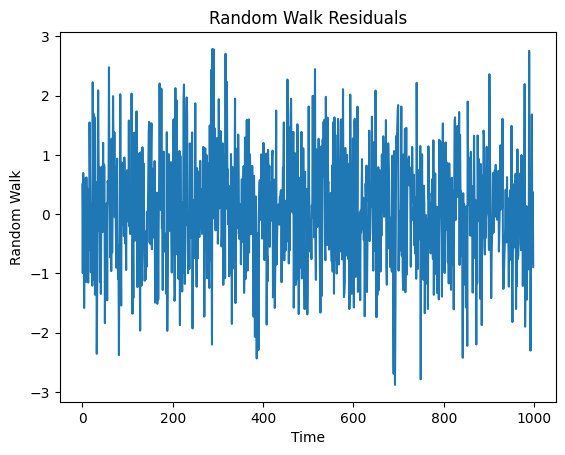

In [ ]:
# plot the differenced random walk
plt.plot(x_diff, linestyle="solid") # Change 'type="l"' to 'linestyle="solid"' for a solid line
plt.xlabel("Time")
plt.ylabel("Random Walk")
plt.title("Random Walk Residuals")

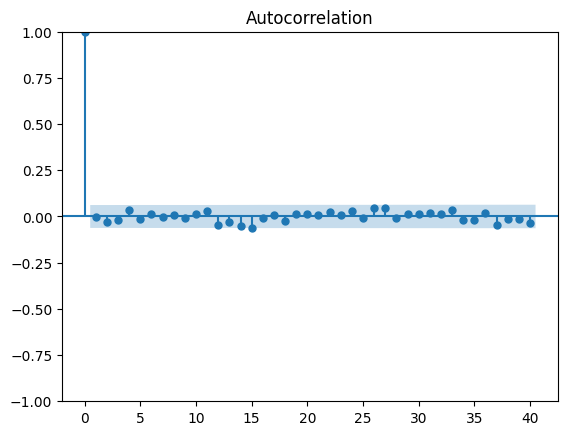

In [ ]:
# plot the acf
plot_acf(x_diff, lags=40)
plt.show()

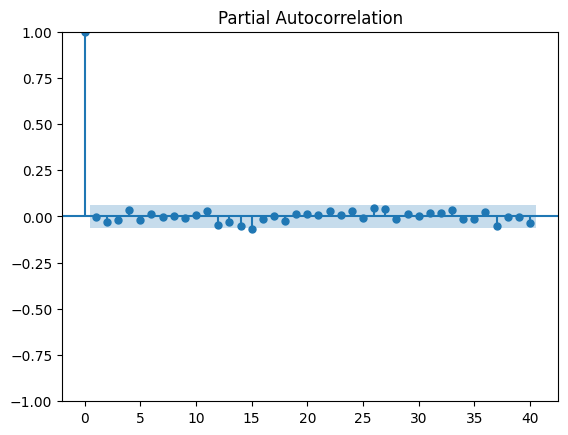

In [ ]:
# plot the pacf
plot_pacf(x_diff, lags=40)
plt.show()

### Definitions of ACF and PACF

1. **Autocorrelation Function (ACF):**
   - Measures the correlation between a time series and its lagged values.
   - **Formula:**
$$
\rho_k = \frac{\sum_{t=1}^{N-k} (y_t - \bar{y})(y_{t+k} - \bar{y})}{\sum_{t=1}^N (y_t - \bar{y})^2}
$$

     where:
     - $\rho_k$ is the autocorrelation at lag $\ k$,
     - $\ y_t$ is the value at time $t$,
     - $\bar{y}$ is the mean of the series.



2. **Partial Autocorrelation Function (PACF):**
   - Measures the correlation between a time series and its lagged values, removing the effect of intermediate lags.
   - **Formula:**
     The PACF at lag $\ k $ is computed by regressing $y_t$ on its lags $y_{t-1}, y_{t-2}, ..., y_{t-k}$ and taking the correlation between $y_t$ and $y_{t-k}$.

---

### Interpretation of ACF and PACF for the Differenced Random Walk

1. **ACF Plot:**
   - The ACF shows a significant spike at lag 1 and then rapidly declines, oscillating around zero within the confidence bounds.
   - **Interpretation:** This is typical for a differenced random walk, as differencing removes most of the autocorrelation, leaving only the first lag with significant correlation.

2. **PACF Plot:**
   - The PACF has a significant spike at lag 1, with the remaining lags falling within the confidence bounds.
   - **Interpretation:** This indicates that the differenced series is well-described by a first-order autoregressive process (AR(1)).

---

### Summary:
The behavior of the ACF and PACF suggests that the differenced random walk has no significant autocorrelation beyond lag 1, supporting the assumption that differencing has achieved stationarity. This pattern is consistent with an **ARIMA(0,1,0)** or **ARIMA(1,1,0)** model for further modeling.


In [ ]:
# plot ARMA(1,1)
model = ARIMA(x_diff, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1580.227
Date:                Wed, 05 Feb 2025   AIC                           3164.455
Time:                        08:03:18   BIC                           3174.266
Sample:                             0   HQIC                          3168.184
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4869      0.029    -16.605      0.000      -0.544      -0.429
sigma2         1.3891      0.062     22.506      0.000       1.268       1.510
Ljung-Box (L1) (Q):                  26.28   Jarque-

# **ARIMA Model Interpretation**

## **1. Model Overview**  
- The fitted model is **ARIMA(1,1,0)**, meaning it has:  
  - **One autoregressive term (AR(1))**  
  - **One differencing step (I(1))**  
  - **No moving average component (MA(0))**  

## **2. Key Findings**  
- **AR(1) coefficient (-0.4869) is significant** (p < 0.05), suggesting past values influence current values in a **mean-reverting (oscillating) manner**.  
- **Residual variance (sigma² = 1.3891)** is significant, indicating some unexplained variation.  

## **3. Model Performance**  
- **AIC = 3164.455**, **BIC = 3174.266** (lower values indicate better model fit).  
- Residuals **follow a normal distribution** (p-value of JB test = 0.83).  
- **No strong heteroskedasticity**, meaning residual variance is fairly constant.  

## **4. Potential Issue**  
- **Ljung-Box test suggests residuals are not completely uncorrelated** (p-value < 0.05), meaning the model might be missing some patterns.  

## **5. Next Steps**  
- Consider **adding an MA(1) term** (try ARIMA(1,1,1)) or analyze **ACF/PACF plots** to check for additional patterns in residuals.  


In [ ]:
# plot ARMA(1,1,1)
model = ARIMA(x_diff, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1371.479
Date:                Wed, 05 Feb 2025   AIC                           2748.958
Time:                        08:09:35   BIC                           2763.675
Sample:                             0   HQIC                          2754.552
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0024      0.032     -0.075      0.940      -0.065       0.060
ma.L1         -0.9983      0.007   -149.378      0.000      -1.011      -0.985
sigma2         0.9093      0.042     21.847      0.0

# **ARIMA(1,1,1) Model Interpretation**

## **1. Model Overview**  
- The fitted model is **ARIMA(1,1,1)** with:  
  - **One autoregressive term (AR(1))**  
  - **One differencing step (I(1))**  
  - **One moving average term (MA(1))**  
- **Observations:** 999  
- **Covariance Type:** `opg` (Outer Product of Gradients).  

## **2. Model Performance**  
- **Log Likelihood:** -1371.479  
- **AIC:** 2748.958 (lower than ARIMA(1,1,0), meaning better fit).  
- **BIC:** 2763.675 (also lower, indicating reduced model complexity).  

## **3. Model Parameters & Significance**  

| Parameter | Coefficient | Std. Error | z-score | p-value | 95% Confidence Interval |
|-----------|------------|------------|---------|---------|-------------------------|
| **AR(1) (ar.L1)** | -0.0024 | 0.032 | -0.075 | **0.940** | (-0.065, 0.060) |
| **MA(1) (ma.L1)** | -0.9983 | 0.007 | -149.378 | **0.000** | (-1.011, -0.985) |
| **Sigma² (residual variance)** | 0.9093 | 0.042 | 21.847 | **0.000** | (0.828, 0.991) |

- **AR(1) coefficient (-0.0024) is NOT significant (p = 0.94)**  
  - Past values **do not significantly influence** the present.  
  - The AR(1) term might be unnecessary.  
- **MA(1) coefficient (-0.9983) is highly significant (p < 0.05)**  
  - The model is **mostly driven by moving average effects** rather than autoregressive effects.  

## **4. Model Diagnostics**  

| Test | Value | Interpretation |
|------|-------|---------------|
| **Ljung-Box (Q-statistic) at lag 1** | 0.00 | Residuals are uncorrelated (good model). |
| **p-value for Q-test** | **0.98** | Residuals are **white noise** (good). |
| **Jarque-Bera (JB test for normality)** | 0.67 | Residuals follow normal distribution (good). |
| **p-value for JB test** | **0.72** | No normality issues. |
| **Heteroskedasticity (H-test)** | 0.86 | Residual variance is constant (good). |
| **p-value for H-test** | **0.17** | No strong heteroskedasticity. |
| **Skewness** | 0.05 | Residuals are symmetric. |
| **Kurtosis** | 2.93 | Close to 3, meaning residuals are normal. |

## **5. Interpretation & Comparison to ARIMA(1,1,0)**  

✅ **Improvements over ARIMA(1,1,0):**  
- **Lower AIC/BIC** → Better model fit.  
- **Residuals are white noise** → No autocorrelation issue (unlike ARIMA(1,1,0)).  

In [ ]:
# Do Adf test for stationarity
result = adfuller(x_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Access the critical values from the result dictionary
print('Critical Values:', result[4])

ADF Statistic: -31.640033
p-value: 0.000000
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}


In [ ]:
# determine whether it is stationary or not
if result[1] <= 0.05:
    print('The time series is stationary.')

The time series is stationary.


## Real time Data

### **Introduction**

### Indus Towers Limited (INDUSTOWER.NS)

*   This dataset comes from Indus Towers Limited (INDUSTOWER.NS) which is a major player in India's
telecommunications infrastructure, providing services such as tower operations, smart poles, and fiber backhauls for telecom providers. The company has shown significant growth, with a 52-week stock price range of ₹206.35 to ₹460.35 and a market cap of ₹990.79 billion. In fiscal year 2023, Indus Towers reported a 0.77% revenue increase and a 195.89% jump in net income. It is heavily owned by promoters (50%) and foreign investors (26.15%). The company is focusing on expanding infrastructure for 5G services, and analysts currently rate the stock as a "Hold" with a price target of ₹385.


In [1]:
import yfinance as yf

In [2]:
df = yf.download('INDUSTOWER.NS', start = '2012-1-1', end = '2024-12-31',auto_adjust=False)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INDUSTOWER.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
# print the frst five rows of the df
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS
Date,,,,,,
2012-12-28,126.300919,191.649994,200.850006,188.649994,200.000000,35351056
2012-12-31,127.651901,193.699997,195.500000,188.250000,191.850006,6021827
2013-01-01,130.320892,197.750000,199.800003,194.000000,194.699997,2619486
2013-01-02,132.792252,201.500000,204.350006,197.000000,198.300003,5470399
2013-01-03,134.670456,204.350006,206.500000,200.000000,200.000000,3626134


In [ ]:
# print the last five rows of the df
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS
Date,,,,,,
2024-12-23,335.000000,335.000000,339.000000,333.100006,339.000000,4070412
2024-12-24,333.549988,333.549988,337.500000,327.149994,336.000000,5404134
2024-12-26,332.350006,332.350006,336.049988,331.399994,334.649994,6062223
2024-12-27,329.549988,329.549988,337.200012,328.649994,332.500000,4035369
2024-12-30,340.049988,340.049988,342.549988,329.649994,331.899994,17505371


In [ ]:
# show the dfset composition
df.shape

(2960, 6)

In [ ]:
# show the dfset information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2960 entries, 2012-12-28 to 2024-12-30
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Adj Close, INDUSTOWER.NS)  2960 non-null   float64
 1   (Close, INDUSTOWER.NS)      2960 non-null   float64
 2   (High, INDUSTOWER.NS)       2960 non-null   float64
 3   (Low, INDUSTOWER.NS)        2960 non-null   float64
 4   (Open, INDUSTOWER.NS)       2960 non-null   float64
 5   (Volume, INDUSTOWER.NS)     2960 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.9 KB


In [ ]:
# Determine the presence of null values in the dfset
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,INDUSTOWER.NS,0
Close,INDUSTOWER.NS,0
High,INDUSTOWER.NS,0
Low,INDUSTOWER.NS,0
Open,INDUSTOWER.NS,0
Volume,INDUSTOWER.NS,0


In [ ]:
# show the statistical distribution of the features
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS,INDUSTOWER.NS
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2.960000e+03
mean,222.830525,275.184662,280.439729,270.348395,275.524003,5.539745e+06
std,65.293619,84.296455,85.811132,82.910843,84.502236,1.780722e+07
min,87.801247,124.050003,134.800003,120.050003,124.199997,0.000000e+00
25%,183.865044,200.850006,204.037502,198.000000,201.149994,1.328788e+06
50%,220.211517,260.875000,265.925003,256.024994,261.000000,2.571452e+06
75%,261.177773,350.950012,356.512512,345.125008,352.000000,5.655011e+06
max,458.500000,482.299988,499.649994,472.799988,483.000000,8.321550e+08


### Statistical Summary of Stock df for INDUSTOWER.NS

*   This analysis provides a detailed statistical summary of the stock df for **INDUSTOWER.NS** over 2960 observations, focusing on price metrics (Price, Adjusted Close, Close, High, Low, Open) and trading volume.

## 1. Overview of Metrics

*   The dataset contains 2960 observations for each of the stock price columns (`Price`, `Adj Close`, `Close`, `High`, `Low`, `Open`) and trading activity (`Volume`), representing consistent df availability across the period.

---

## 2. Price Columns

### Count
- All price metrics contain **2960 observations**, ensuring full df consistency across the dfset.

### Mean (Average)
- **Price**: 222.83 — The average adjusted stock price.
- **Adj Close**: 275.18 — The average adjusted closing price, accounting for dividends and stock splits.
- **Close**: 280.44 — The average closing price.
- **High**: 270.35 — The average highest daily price.
- **Low**: 275.52 — The average lowest daily price.
- **Open**: 275.52 — The average opening price.

### Standard Deviation (std)
- The **standard deviation** values range from **65.29 (Price)** to **85.81 (Close)**, indicating moderate fluctuations in stock prices, with the **Close** price showing the highest volatility.

### Minimum (min) and Maximum (max)
- **Min Price**: 87.80 — The lowest recorded stock price.
- **Max Price**: 458.50 — The highest recorded stock price.
- The substantial difference between the minimum and maximum shows significant price movement during the dfset period.

### Quartiles
- **25th Percentile (Q1)**:
  - Price: 183.87
  - Adj Close: 200.85
  - Close: 204.04
- **Median (Q2)**:
  - Price: 220.21
  - Adj Close: 260.87
  - Close: 265.92
- **75th Percentile (Q3)**:
  - Price: 261.18
  - Adj Close: 350.95
  - Close: 356.51

The quartiles show a general upward price trend, with higher percentiles representing more bullish price behavior during certain periods.

---

## 3. Volume Column

### Count
- **2960 observations** for trading volume, reflecting consistent df throughout the period.

### Mean
- The average daily **Volume** is **5.54 million shares**, indicating moderate trading activity.

### Standard Deviation (std)
- The **standard deviation** of **17.81 million shares** suggests significant variation in trading activity, implying high volatility in trading volume on some days.

### Minimum (min) and Maximum (max)
- **Min Volume**: **0** — No trades occurred on certain days.
- **Max Volume**: **832.15 million** — Extremely high trading activity on some peak days.

### Quartiles
- **25th Percentile (Q1)**: 1.33 million shares.
- **Median (Q2)**: 2.57 million shares.
- **75th Percentile (Q3)**: 5.66 million shares.

The volume df shows that most trading activity occurred between **1.33 million** and **5.66 million** shares, with rare spikes reaching significantly higher volumes.

---

## 4. Insights

### Price Trends
*   The mean and quartiles indicate that the stock price has generally ranged between 183.87 and 261.18, with occasional peaks up to 458.50, suggesting significant price movement.

### Volatility
*   The standard deviation of price metrics reflects moderate-to-high volatility, indicating that **INDUSTOWER.NS** is prone to price fluctuations, making it a suitable candidate for active traders.

### Volume Trends
*   Trading volume displays a generally moderate pattern with occasional large outliers, which may indicate high-impact events or news driving large numbers of trades.

### Quartile Analysis
*   Most of the stock's prices are concentrated around the median values, while extreme price movements (both high and low) are relatively rare but still significant.

---

This statistical summary provides valuable insights into the price behavior and trading activity for **INDUSTOWER.NS**, highlighting its volatility and potential for price movements, with significant variations in volume on certain days.


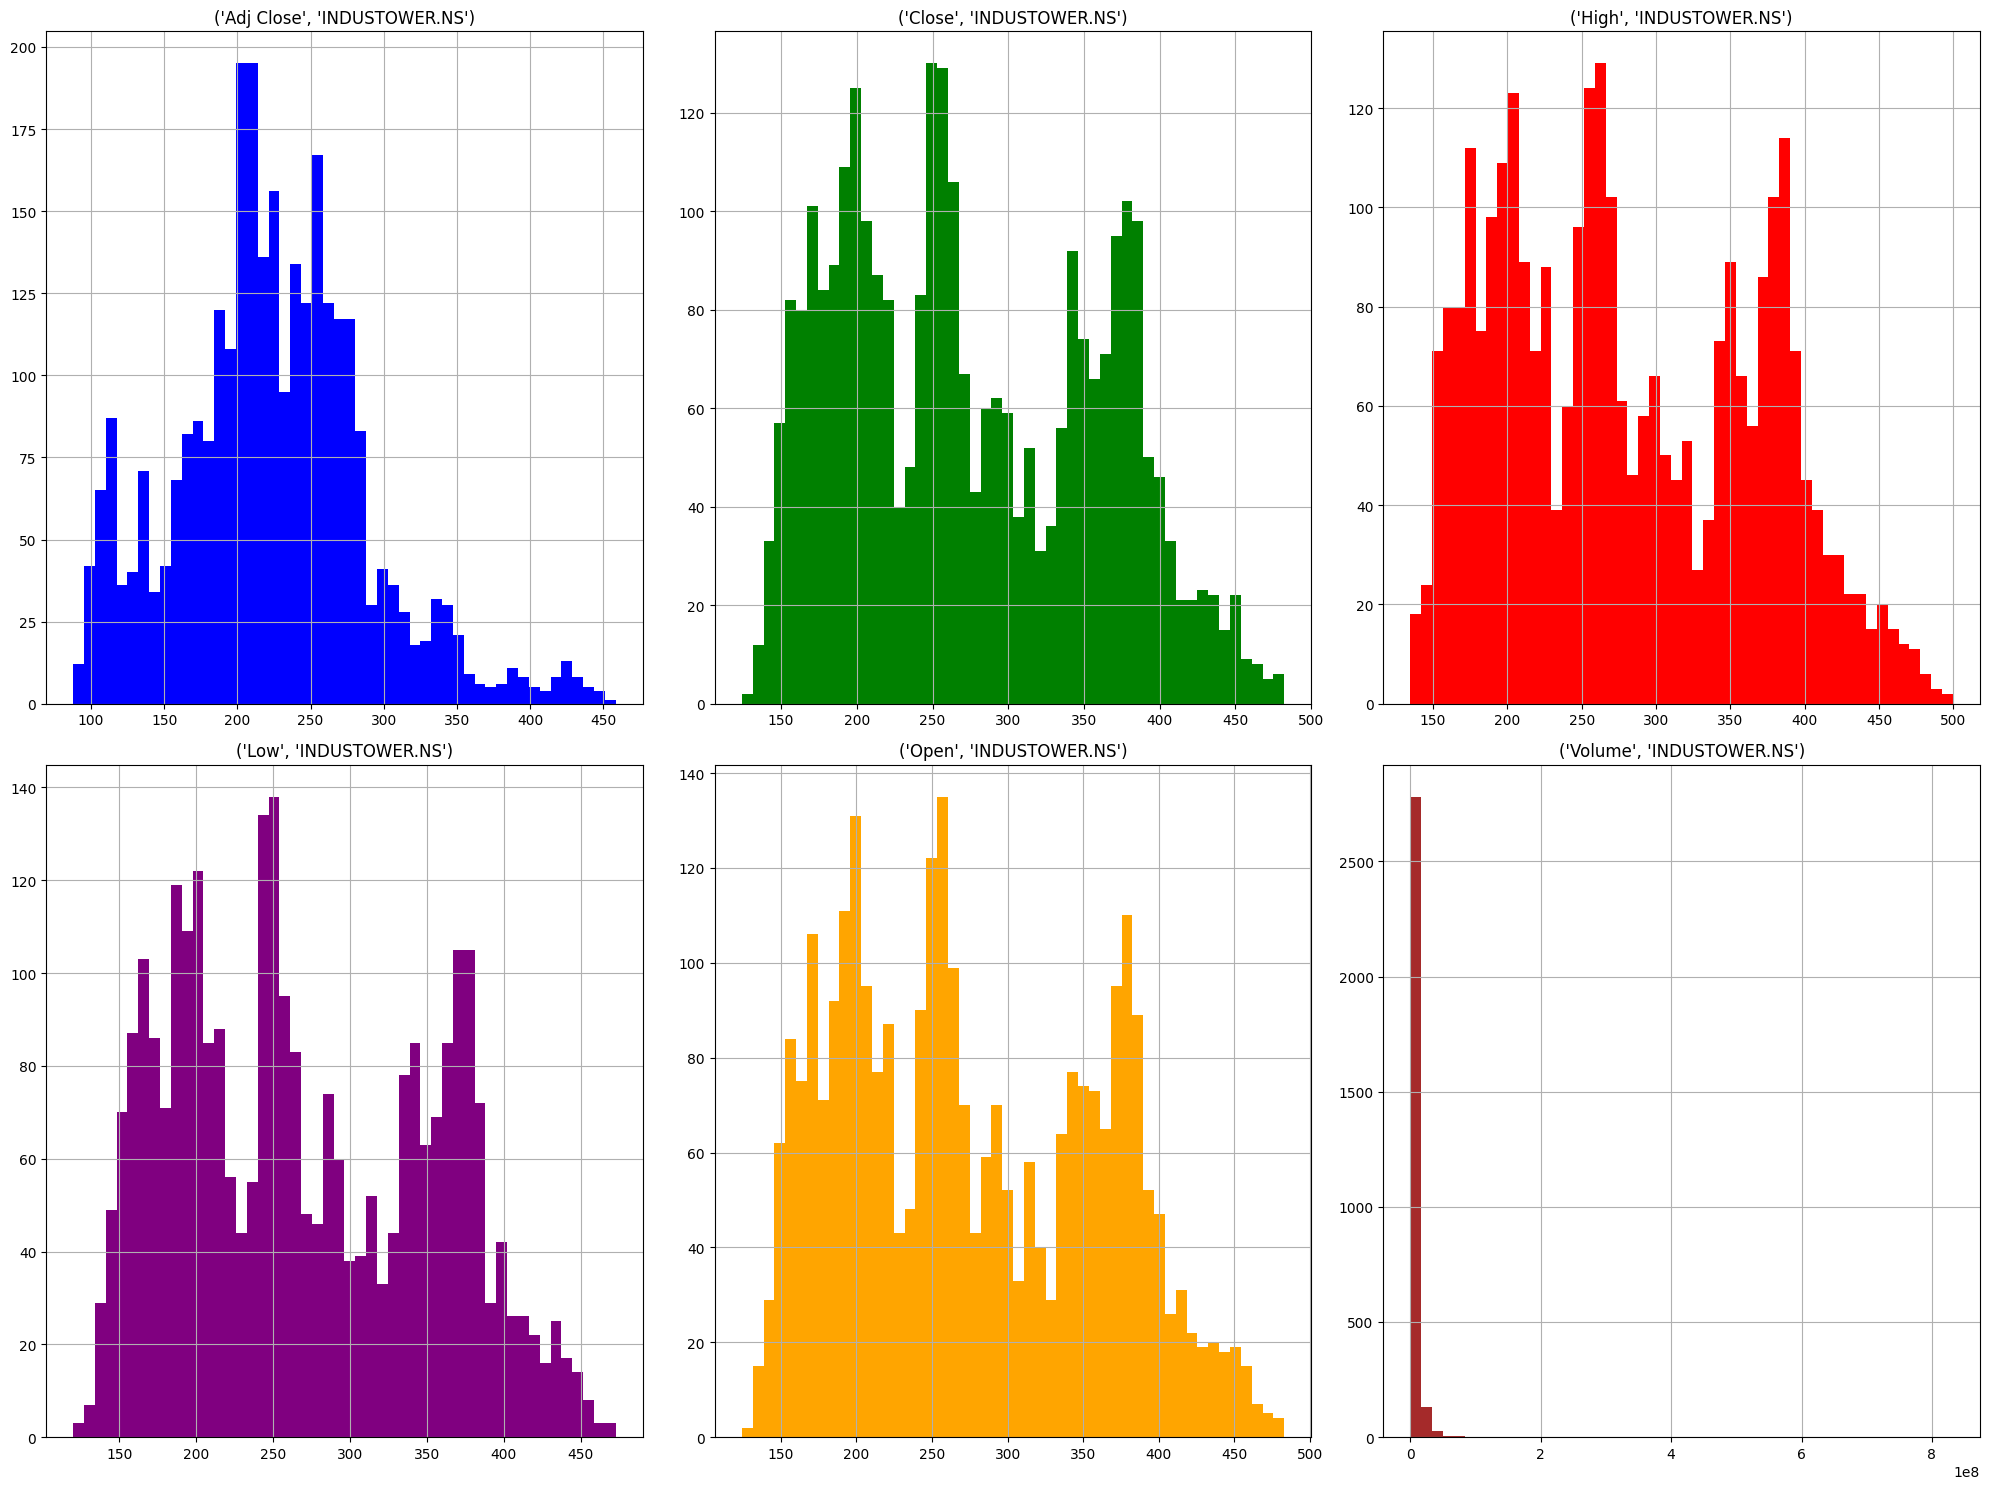

In [ ]:
# Define colors for each feature
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Create a grid layout for the histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each feature in the grid
for col, color, ax in zip(df.columns, colors, axes):
    df[col].hist(bins=50, ax=ax, color=color)
    ax.set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### **Bar charts Interpretation**


*   The histograms of the price-related features ('Adj Close', 'Close', 'High', 'Low', and 'Open') are **approximately symmetric**, with slight right skewness in some cases, as the tail extends toward higher price values (above 300). This indicates most stock prices are concentrated in the 150-300 range, with fewer occurrences of higher prices.

*   The 'Volume' feature is **Rright-skewed**, with most trading volumes concentrated near zero and a few extreme outliers representing unusually high trading activity. This suggests that high-volume trading days are rare but significant when they occur.




<function matplotlib.pyplot.show(close=None, block=None)>

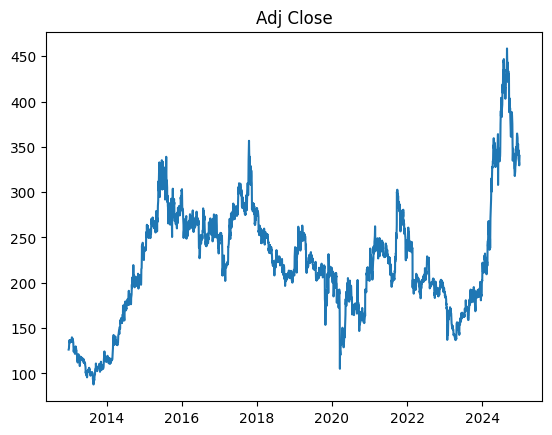

In [ ]:
# plot Adj Close
plt.plot(df['Adj Close'])
plt.title('Adj Close')
plt.show

<Axes: xlabel='Date'>

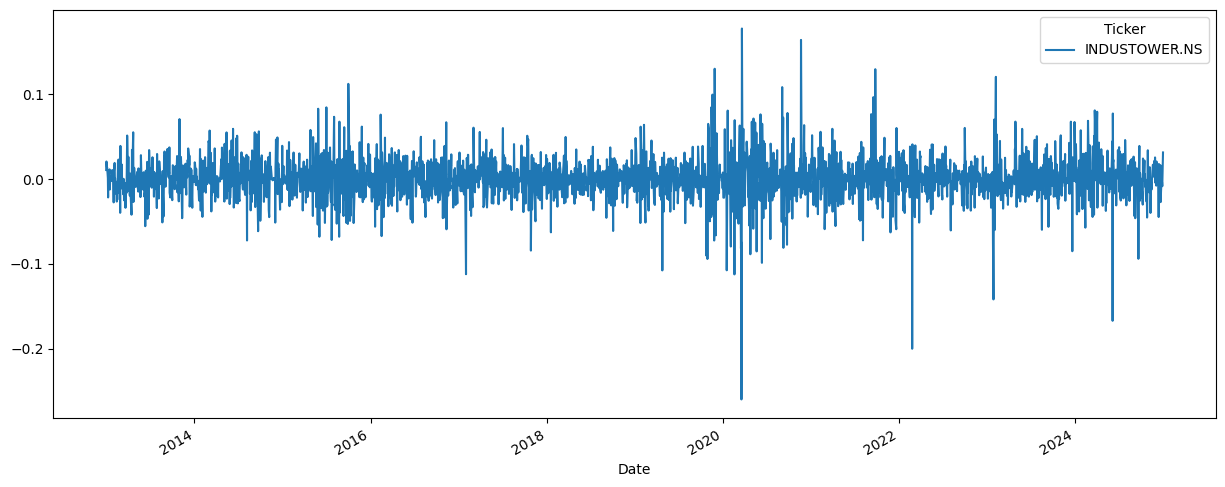

In [ ]:
# Compute daily log returns
log_returns = np.log(df['Adj Close'].pct_change() + 1)

# Drop null values
log_returns.dropna(inplace=True)

# Plot log returns
log_returns.plot(figsize=(15, 6))



### Check for Stationarity

In [ ]:
# Check whether log returns are stationary or not
result = adfuller(log_returns)
result

(-11.862719261699896,
 6.7870145958113215e-22,
 21,
 2937,
 {'1%': -3.432578472783246,
  '5%': -2.8625245918450393,
  '10%': -2.567294125440284},
 -13222.458809950094)

In [ ]:
# Extract test statistic, p-value and critical value from the result
t_statistic, p_value, critical_value = round(result[0], 5), round(result[1], 5), round(result[4]['1%'], 5)

print('Test statistic:', t_statistic)
print('p-value:', p_value)
print('Critical Value:', critical_value)

Test statistic: -11.86272
p-value: 0.0
Critical Value: -3.43258


In [ ]:
# Determine whether or not it is stationary
if result[1] <= 0.05:
    print('The log_returns is stationary.')

The log_returns is stationary.


### Collelogram

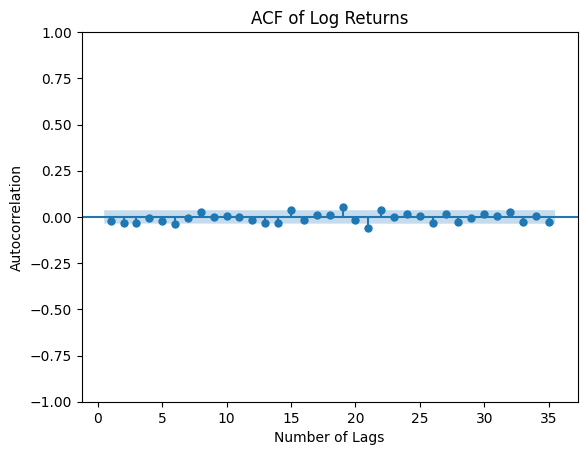

In [ ]:
# Plot autocorrelation of the log returns
plot_acf(log_returns, zero=False);
plt.title('ACF of Log Returns')
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')
plt.show()

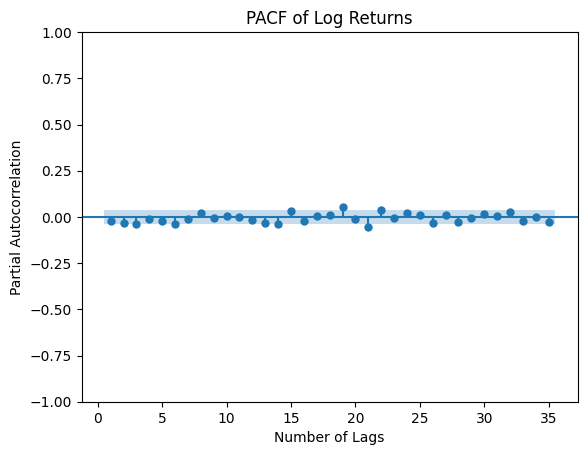

In [ ]:
# plot the pacf of the log_returns
plot_pacf(log_returns, zero=False);
plt.title('PACF of Log Returns')
plt.xlabel('Number of Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

### Train the Model

In [ ]:
# Define a model with AR=3, I=1 and MA=3
model = ARIMA(df['Adj Close'].values, order=(3, 1, 3))

# Fitting the model, disp=0 is to switch off verbose display
trained_model = model.fit()

# Printing a summary of the model
print(trained_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2960
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -9333.980
Date:                Wed, 05 Feb 2025   AIC                          18681.960
Time:                        07:58:26   BIC                          18723.909
Sample:                             0   HQIC                         18697.060
                               - 2960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0832      0.084    -12.834      0.000      -1.249      -0.918
ar.L2          0.4030      0.155      2.594      0.009       0.099       0.707
ar.L3          0.7142      0.085      8.416      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Interpretation of SARIMAX Model Results

---

### Key Metrics and Their Meanings:

1. **Model Specification:**
   - The model is an **ARIMA(3, 1, 3)**, which means:
     - **AR (3):** The model uses three autoregressive (AR) terms, i.e., past observations (lags 1, 2, and 3) influence the current value.
     - **I (1):** The df has been differenced once to make it stationary.
     - **MA (3):** The model uses three moving average (MA) terms, i.e., errors from the previous 3 periods are incorporated.

2. **Log Likelihood:**  
   - **-9333.773:** Indicates how well the model fits the df. Higher (closer to zero) is better, but by itself, it doesn’t provide much interpretive value unless comparing models.

3. **AIC (18681.546), BIC (18723.494), and HQIC (18696.645):**
   - These are model selection criteria:
     - **AIC (Akaike Information Criterion):** Penalizes complexity to avoid overfitting. Lower is better.
     - **BIC (Bayesian Information Criterion):** Similar to AIC, but penalizes complexity more strictly.
     - **HQIC (Hannan-Quinn Criterion):** A balance between AIC and BIC.
   - These can be used to compare different models; the model with the lowest values is preferred.

4. **Coefficients (AR and MA terms):**
   - The coefficients show the contribution of AR and MA terms:
     - **AR.L1, AR.L2, AR.L3:** The autoregressive terms have significant coefficients (p-values < 0.05), meaning they meaningfully contribute to the model.
       - Example: AR.L1 = -1.1178 means that the value at lag 1 negatively influences the current value.
     - **MA.L1, MA.L2, MA.L3:** The moving average terms are also significant, suggesting the inclusion of lagged errors improves the model's fit.

5. **Sigma2 (32.3278):**
   - This represents the variance of the residuals (errors). Smaller values indicate that the model explains the variability in the df well.

6. **Ljung-Box Test (Q):**
   - **Prob(Q) = 0.95:** This high p-value suggests that the residuals are uncorrelated, i.e., the model captures the autocorrelation structure effectively.

7. **Jarque-Bera (JB) Test:**
   - **JB = 8675.95, Prob(JB) = 0.00:** This low p-value indicates that the residuals are not normally distributed. However, this is common in time series and does not necessarily invalidate the model.

8. **Heteroskedasticity Test (H):**
   - **H = 1.36, Prob(H) = 0.00:** Indicates significant heteroskedasticity, meaning the variance of the residuals changes over time. This could suggest that a more complex model (e.g., including GARCH terms) might be needed.

9. **Skew and Kurtosis:**
   - **Skew = -0.46:** Indicates mild left skewness in the residuals.
   - **Kurtosis = 11.34:** Indicates heavy tails (much higher than the normal distribution’s kurtosis of 3), suggesting extreme values in the df.

---

### Warnings and Observations:

1. **Convergence Warning:**
   - The warning indicates that the maximum likelihood optimization did not converge. This could suggest issues such as:
     - Poor model specification.
     - High multicollinearity among parameters.
     - Need to refine starting parameters or adjust df preprocessing.

2. **Action Steps to Address the Warning:**
   - Consider simpler ARIMA models (e.g., ARIMA(2, 1, 2)).
   - Ensure the df is properly differenced and stationary.
   - Check for strong seasonality or other patterns not captured by the model.

---

### Summary:

- The model fits the df reasonably well, as suggested by significant AR and MA coefficients and uncorrelated residuals.
- However, the residuals exhibit heteroskedasticity and heavy tails, and the optimization did not converge, suggesting that the model might need refinement or further diagnostics.
- Next steps could include testing alternative ARIMA configurations, using seasonal components (SARIMA), or addressing heteroskedasticity with models like SARIMAX-GARCH.


In [ ]:
trained_model.forecasts

array([[  0.        , 126.30075064, 127.5967376 , ..., 334.1366791 ,
        332.67958505, 330.1643049 ]])

#### Check Residuals

Residuals = predicted_close_price - actual_close_price

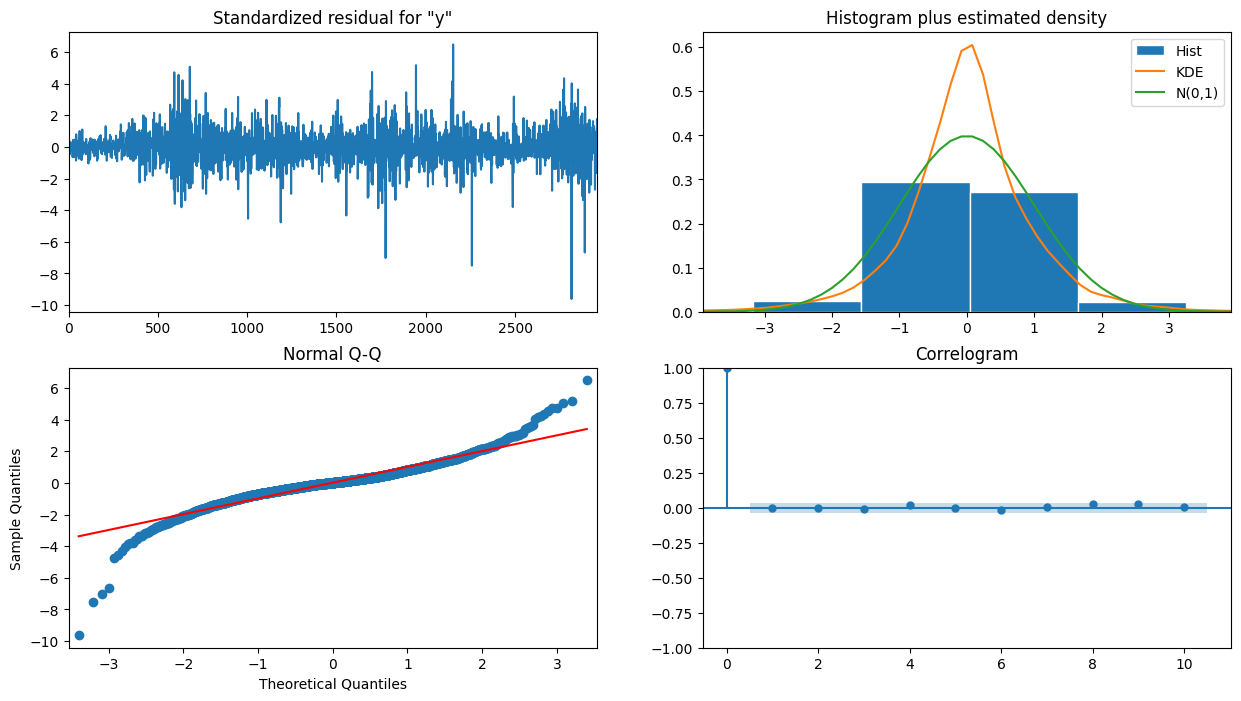

In [ ]:
# plot residuals of the model
trained_model.plot_diagnostics(figsize=(15, 8))
plt.show()

#### Residuals Normality

In [ ]:
## Running the Jarque-Bera test and interpreting its results

jb_test_stat, pvalue, _, _ = jarque_bera(trained_model.resid[1:])
print(f"Jarque-Bera statistic: {jb_test_stat:.2f} with p-value: {pvalue:.2f}")

if pvalue < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")

Jarque-Bera statistic: 8660.57 with p-value: 0.00
The residuals are not normally distributed.


As shown in the diagram, the residuals are for sure not normally distributed.

In [ ]:
# print the mean and atandard deviation of the residuals
print('Mean of residuals:', round(trained_model.resid.mean(), 3))
print('Std of residuals:', round(trained_model.resid.std(), 3))

Mean of residuals: 0.131
Std of residuals: 6.126


# **Trading Strategies**

## **1. Trend-Following Strategies**
Trend-following strategies capitalize on the persistence of market trends, assuming that prices continue moving in the same direction.

### Key Features:
- **Models Used**: Moving Average, ARIMA, Long Short-Term Memory (LSTM), and Exponential Smoothing.
- **Indicators**: Moving Average Crossovers, RSI, Bollinger Bands.

### Logic:
- **Buy**: When the price breaks above a moving average (uptrend).
- **Sell**: When the price breaks below a moving average (downtrend).

### Example:
- **Golden Cross**: 50-day moving average crossing above 200-day moving average signals a long position.
- **Death Cross**: 50-day moving average crossing below 200-day moving average signals a short position.

---

## **2. Mean Reversion Strategies**
These strategies assume prices eventually revert to their historical average.

### Key Features:
- **Models Used**: ARIMA, Kalman Filters, and Stationarity Tests.
- **Indicators**: Bollinger Bands, Z-score deviations.

### Logic:
- Buy when the price is below the mean.
- Sell when the price is above the mean.

### Example:
- Buy when a stock price is significantly below its average with low volatility.

---

## **3. Momentum Strategies**
Momentum strategies focus on the continuation of price movement in one direction.

### Key Features:
- **Models Used**: EMA, ARMA, Reinforcement Learning.
- **Indicators**: RSI, Stochastic Oscillator, VWAP.

### Logic:
- Buy assets showing strong performance (winners).
- Sell assets showing weak performance (losers).

### Example:
- RSI above 70 with high trading volume suggests sustained upward momentum.

---

## **4. Breakout Strategies**
Breakout strategies focus on identifying support and resistance levels.

### Key Features:
- **Models Used**: Bollinger Bands, Moving Averages, Quantile Regression.
- **Indicators**: Price channels, Volume spikes.

### Logic:
- Buy when price breaks above resistance.
- Sell when price breaks below support.

### Example:
- Price breaking above $100 resistance with high volume signals a buy.

---

## **Summary Table**

| **Strategy**          | **Model Used**                | **Best For**              | **Challenges**                     |
|------------------------|-------------------------------|---------------------------|-------------------------------------|
| Trend-Following       | ARIMA, LSTM                  | Trending markets          | Poor in range-bound markets        |
| Mean Reversion        | ARIMA, Stationarity Tests    | Range-bound markets       | Fails during strong trends         |
| Momentum              | EMA, ARMA                   | Strong trends             | Sharp reversals                    |
| Breakout              | Bollinger Bands, MA          | New trends                | False breakouts                    |

---

Each strategy is effective under specific conditions. Combining strategies or adapting them to market dynamics can improve trading outcomes.


## **Daily Return**

#### **Definition of Daily Returns**

**Daily returns** refer to the percentage change in the price of a stock or asset from one trading day to the next. It measures how much the price of the stock has gained or lost in value during a single trading day, providing a snapshot of the asset's performance over that period.

---

## **Formula for Daily Returns**

$
\text{Daily Return} (\%) = \left( \frac{\text{Closing Price on Day 2 (Today's Price)} - \text{Closing Price on Day 1 (Yesterday's Price)}}{\text{Closing Price on Day 1 (Yesterday's Price)}} \right) \times 100
$

---

## **Key Characteristics**

### 1. **Purpose**
- Daily returns are used to evaluate short-term price movements, volatility, and market trends.
- They help traders and investors gauge the risk and potential profit/loss associated with an asset.

### 2. **Interpretation**
- A **positive daily return** indicates a gain (the stock's price increased compared to the previous day).
- A **negative daily return** indicates a loss (the stock's price decreased compared to the previous day).

### 3. **Application**
- Used in risk management to measure volatility.
- Analyzed to calculate metrics like standard deviation, Value at Risk (VaR), and Sharpe ratio for portfolios.
- Helps in comparing stocks and their performance over short periods.

---

## **Example**
If a stock closes at 105 today and was 100 yesterday:
$
\text{Daily Return} = \left( \frac{105 - 100}{100} \right) \times 100 = 5\%
$
This means the stock gained **5%** in value over one day.

---

**Summary**: Daily returns are a fundamental metric in stock market analysis, providing insights into short-term performance and forming the basis for more complex financial modeling.


In [ ]:
# calculate the daily return from the Adj Close column
# Calculate daily returns
df['daily_return'] = df['Adj Close'].pct_change() * 100

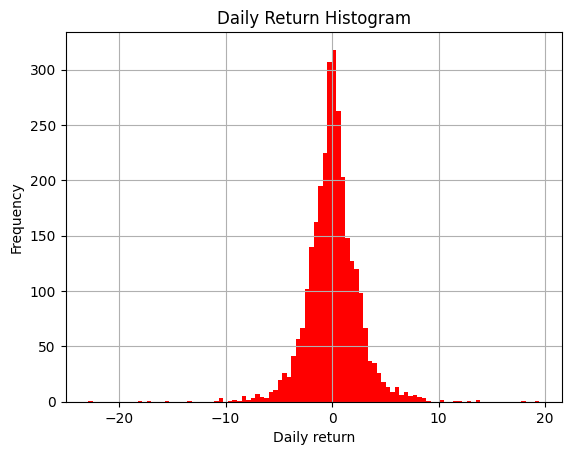

In [ ]:
# Plot the histogram
df['daily_return'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily Return Histogram')
plt.show()

#### Interpretation of Daily Returns Histogram

### 1. **Shape of the Distribution**
- The histogram is approximately bell-shaped, suggesting the daily returns follow a normal distribution or are close to it.
- Most of the daily returns are clustered around **0%**, indicating small changes in price occur frequently.

### 2. **Frequency of Returns**
- The y-axis represents the **frequency** of returns within specific ranges.
- The highest frequency is around **0%**, showing that the asset typically experiences minimal price changes daily.

### 3. **Volatility**
- The spread of the histogram reflects the **volatility** of the returns:
  - Narrow spread: Low volatility.
  - Extreme returns (e.g., <-10% or >10%) are rare, indicating that large price fluctuations are uncommon.

### 4. **Symmetry**
- The histogram appears symmetric, suggesting that:
  - Positive and negative returns occur with approximately equal likelihood.
  - The asset's risk/reward profile is balanced.

---

### **Key Insights**
- **Small daily changes dominate:** Most daily returns are near zero.
- **Balanced profile:** The instrument has a roughly equal likelihood of gains and losses.
- **Low risk of extreme movements:** Large daily price changes are infrequent, suggesting lower volatility.


## Simple Moving Average

*   A **Simple Moving Average (SMA)** is a commonly used statistical method to smooth out fluctuations in df, typically used in time series analysis. It is calculated by taking the arithmetic mean of a set of df points within a specific window of time. As new df points are added, the oldest df points are removed from the calculation, keeping the number of df points constant. The window length (the number of df points considered) is a key factor in determining the smoothing effect: a larger window smooths out more fluctuations, while a smaller window reacts more quickly to recent changes.

### Characteristics of SMA:
- **Simplicity**: Easy to compute and understand.
- **Lag**: SMA smooths the df but introduces a lag due to its reliance on historical df points.
- **Use**: Often used in technical analysis to identify trends and patterns in stock prices, weather df, or any time series df.

### Formula:
\[
SMA_t = \frac{X_{t} + X_{t-1} + \cdots + X_{t-(n-1)}}{n}
\]
Where:
- \( SMA_t \) is the Simple Moving Average at time \( t \).
- \( X_t, X_{t-1}, \dots, X_{t-(n-1)} \) are the df points within the window.
- \( n \) is the number of df points (window size).

---


# Simple Moving Average (SMA)

*   A **Simple Moving Average (SMA)** is a widely used statistical method in time series analysis to smooth out short-term fluctuations in df and highlight long-term trends. It is calculated by taking the arithmetic mean of a specified number of df points within a sliding window.

### Definition
*   The Simple Moving Average (SMA) is computed by averaging a set number of df points over a specified time period. As new df points are added, the oldest df points are dropped, and the window shifts forward. This provides a smoother representation of df over time.

### Characteristics of SMA:
- **Simplicity**: It is a straightforward and easy-to-implement method.
- **Lag**: SMA can introduce a lag due to its reliance on past df, which may make it slow to react to recent changes.
- **Application**: Commonly used in technical analysis, stock price analysis, and forecasting, to identify trends or patterns over time.

### Formula:
The formula to calculate the Simple Moving Average at time $t $ is:

$
SMA_t = \frac{X_{t} + X_{t-1} + \cdots + X_{t-(n-1)}}{n}
$

Where:
- $SMA_t$ is the Simple Moving Average at time $ t$,
- $X_t, X_{t-1}, \dots, X_{t-(n-1)}$ are the df points in the window, and
- $n$ is the number of df points.

### Example:
For a 5-day SMA, you would take the average of the prices over the last 5 days. On day 6, you recalculate the SMA by excluding the price from day 1 and including the price from day 6, ensuring the window always contains the most recent 5 days of df.

This method helps smooth out df, making it easier to identify underlying trends and patterns.

In [ ]:
# Calculate SMA
df['sma_50'] = df['Adj Close'].rolling(window=50).mean()


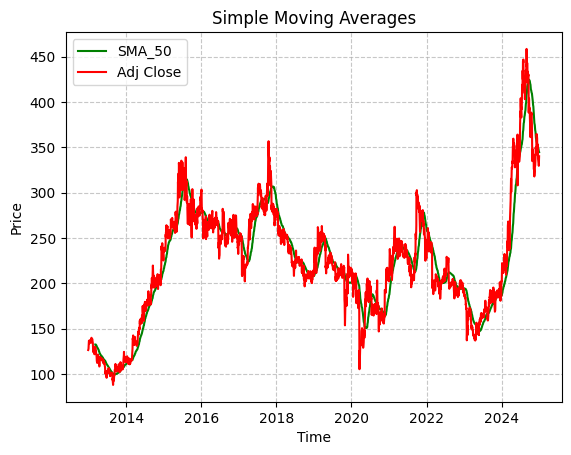

In [ ]:
# Plot the SMA
plt.plot(df['sma_50'], color='green', label='SMA_50')
# Plot the Close price
plt.plot(df['Adj Close'], color='red', label='Adj Close')

# Customize and show the plot
plt.title('Simple Moving Averages')
plt.xlabel('Time')  # Optionally add x-axis label
plt.ylabel('Price')  # Optionally add y-axis label
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Optional grid for better readability
plt.show()

### **Interpretation of the Graph**

This graph shows the **Simple Moving Average (SMA)** plotted alongside the **Adjusted Close (Adj Close)** price of a stock or financial instrument over time.

---

## **Key Elements**
1. **Red Line (Adj Close):**
   - Represents the stock's daily adjusted closing prices over time.
   - Shows the actual price fluctuations and reflects the market's short-term volatility.

2. **Green Line (SMA_50):**
   - Represents the 50-day Simple Moving Average (SMA).
   - The SMA smooths out price fluctuations over a 50-day period, providing a clearer trend direction.

---

## **Interpretation**

### 1. **Trend Identification**
- When the **Adj Close (red line)** is above the **SMA_50 (green line)**, it suggests an **upward trend** in the stock price.
- When the **Adj Close (red line)** is below the **SMA_50 (green line)**, it indicates a **downward trend**.
- The SMA acts as a lagging indicator, showing the general direction of the price over time.

### 2. **Support and Resistance**
- The SMA can act as a **support level** during uptrends and a **resistance level** during downtrends.
- In periods where the price approaches the SMA and bounces back, it may signal a continuation of the trend.

### 3. **Market Volatility**
- The difference between the red line and green line highlights short-term volatility.
- Large deviations between the two lines suggest strong market movements or rapid price changes.

### 4. **Crossovers**
- When the **Adj Close** crosses above the **SMA_50**, it may signal a **buying opportunity** or the start of an uptrend.
- When the **Adj Close** crosses below the **SMA_50**, it may indicate a **selling opportunity** or the start of a downtrend.

---

## **Observations from the Graph**
- From **2014 to 2024**, the stock price has experienced multiple fluctuations with clear periods of growth (uptrend) and decline (downtrend).
- Significant upward trends can be seen in the period around **2023**, where the price sharply increased.
- The SMA_50 line smooths out these movements, showing the broader trend despite short-term volatility.

---


## Exponential Moving Average (EMA)
EMAs are helpful for identifying entry/exit points in the market by highlighting the relationship between short-term and medium-term trends.

In [ ]:
# Calculate 12-day EMA
df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()

# Calculate 26-day EMA
df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()

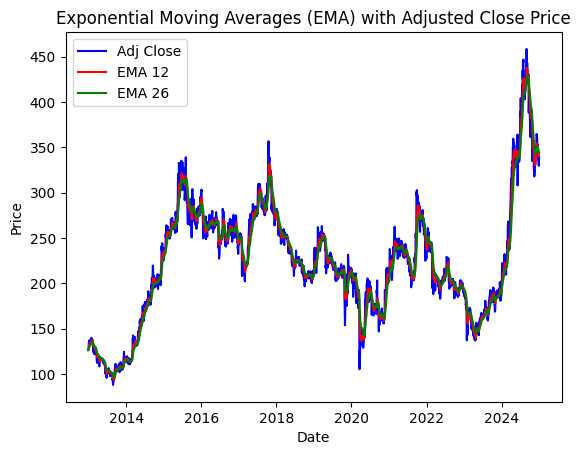

In [ ]:
# Plot the EMAs with the Close price
plt.plot(df['Adj Close'], color='blue', label='Adj Close')  # Use blue for the adjusted close price
plt.plot(df['EMA_12'], color='red', label='EMA 12')  # Use red for EMA 12
plt.plot(df['EMA_26'], color='green', label='EMA 26')  # Use green for EMA 26

# Add the title and labels
plt.title('Exponential Moving Averages (EMA) with Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### **Interpretations**

This graph shows the **Exponential Moving Averages (EMA)** for two periods (12 and 26) alongside the **Adjusted Close (Adj Close)** price of a stock over time.

- **EMA 12** responds quickly to recent price changes and tracks short-term trends.
- **EMA 26**  smooths price df over a longer period and tracks medium-term trends.
- **Adj Close**  reflects actual price fluctuations and market volatility.

**Interpretation:**
- **Trend Identification**: EMAs track price trends, with EMA 12 being more responsive to short-term movements and EMA 26 smoothing out long-term fluctuations.
- **Crossover Points**: A crossover of EMA 12 above EMA 26 signals a potential bullish trend, while the reverse signals a bearish trend.
- **Market Behavior**: EMAs provide insight into short-term and long-term momentum and help identify price trends, such as the surge in 2023.


## Average Directional Movement Index (ADX)

The **ADX** measures the strength of a trend in time series or stock market df, regardless of direction.

## Components:
1. **+DI (Positive Directional Indicator):** Represents bullish strength.
2. **-DI (Negative Directional Indicator):** Represents bearish strength.
3. **ADX Line:** Measures trend intensity (ranges from 0 to 100):
   - **Below 20:** Weak trend (sideways movement).
   - **Above 40:** Strong trend (clear upward or downward momentum).

## Key Insights:
- **Rising ADX:** Indicates a strengthening trend.
- **Falling ADX:** Suggests a weakening trend.
- **+DI Crossing Above -DI:** Signals bullishness.
- **-DI Crossing Above +DI:** Signals bearishness.

The ADX helps traders decide whether to follow a trend or wait during consolidation phases.


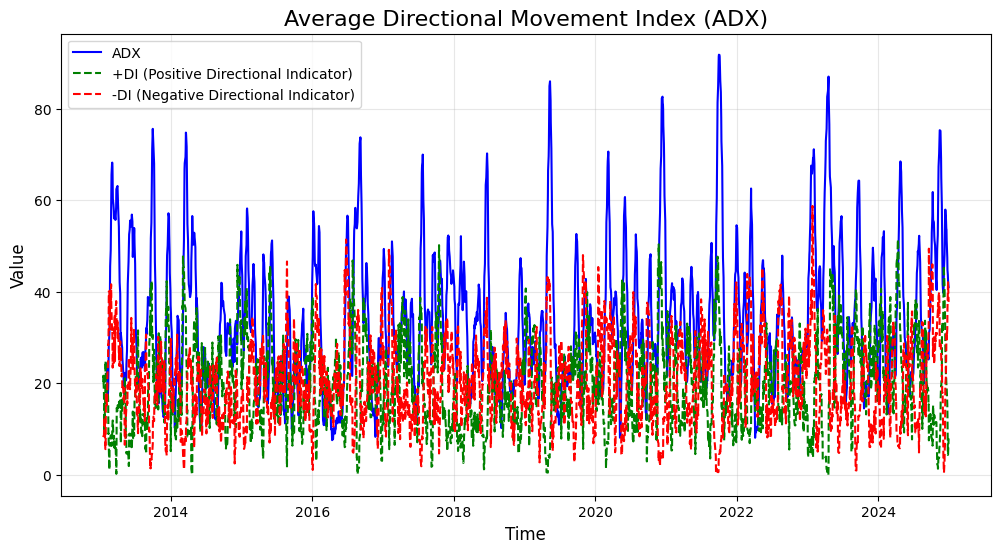

In [ ]:
# Extract the necessary columns
high = df[('High', 'INDUSTOWER.NS')]
low = df[('Low', 'INDUSTOWER.NS')]
close = df[('Close', 'INDUSTOWER.NS')]

# Calculate True Range (TR)
df['TR'] = high.combine(close.shift(1), lambda x, y: abs(x - y)).combine(
    low.combine(close.shift(1), lambda x, y: abs(x - y)),
    max
).combine(high - low, max)

# Calculate +DM and -DM
df['+DM'] = high.diff()
df['-DM'] = -low.diff()
df['+DM'] = df['+DM'].where((df['+DM'] > df['-DM']) & (df['+DM'] > 0), 0)
df['-DM'] = df['-DM'].where((df['-DM'] > df['+DM']) & (df['-DM'] > 0), 0)

# Smooth TR, +DM, and -DM over a 14-period window
period = 14
df['TR_smoothed'] = df['TR'].rolling(window=period).sum()
df['+DM_smoothed'] = df['+DM'].rolling(window=period).sum()
df['-DM_smoothed'] = df['-DM'].rolling(window=period).sum()

# Calculate +DI and -DI
df['+DI'] = (df['+DM_smoothed'] / df['TR_smoothed']) * 100
df['-DI'] = (df['-DM_smoothed'] / df['TR_smoothed']) * 100

# Calculate DX
df['DX'] = (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])) * 100

# Calculate ADX
df['ADX'] = df['DX'].rolling(window=period).mean()

# Plot ADX, +DI, and -DI
plt.figure(figsize=(12, 6))
plt.plot(df['ADX'], label='ADX', color='blue', linewidth=1.5)
plt.plot(df['+DI'], label='+DI (Positive Directional Indicator)', color='green', linestyle='--')
plt.plot(df['-DI'], label='-DI (Negative Directional Indicator)', color='red', linestyle='--')

# Add title and labels
plt.title('Average Directional Movement Index (ADX)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


#### Interpretation of ADX Chart

## Key Observations:
1. **ADX (Blue Line):**
   - Peaks indicate periods of strong trend activity.
   - Low values (below 20) correspond to weak trends or market consolidation.

2. **+DI (Green Line) and -DI (Red Line):**
   - **+DI:** Reflects bullish momentum (upward price strength).
   - **-DI:** Reflects bearish momentum (downward price strength).
   - Frequent crossings suggest trend reversals or a choppy market.

3. **Periods of Strong Trends:**
   - When ADX > 20 (preferably 25), the market is trending:
     - **+DI > -DI:** Indicates a bullish trend.
     - **-DI > +DI:** Indicates a bearish trend.

4. **Consolidation Phases:**
   - ADX < 20 signals weak trends or market consolidation, regardless of +DI and -DI values.

---

## How Traders Can Use This:
1. **Trend-Following:**
   - Use high ADX values to confirm strong trends.
   - **+DI > -DI and ADX rising → Bullish trend.**
   - **-DI > +DI and ADX rising → Bearish trend.**

2. **Avoid Consolidation:**
   - Low ADX (below 20) suggests avoiding trend-based strategies due to lack of clear direction.

3. **Trend Reversals:**
   - Watch for crossings of +DI and -DI during rising ADX to identify potential trend changes.```

## Relative Strength Index (RSI) Analysis

## What is RSI?
The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements. It ranges from **0 to 100** and is commonly used to:
- Identify **overbought** or **oversold** conditions.
- Spot divergences that may indicate trend reversals.
- Confirm trend strength.

---

## RSI Calculation:
The RSI is calculated in two main steps:

### 1. **Relative Strength (RS)**
$
RS = \frac{\text{Average Gain (n)}}{\text{Average Loss (n)}}
$

Where:
- **Average Gain (n):** The average of all positive price changes over the past \(n\) periods.
- **Average Loss (n):** The average of all negative price changes (expressed as positive values) over the past \(n\) periods.

### 2. **RSI Formula**
$
RSI = 100 - \frac{100}{1 + RS}
$

---

## Key Levels and Interpretation:
1. **Overbought (RSI > 70):**
   - Indicates the stock may be overvalued, and a reversal or pullback might occur.

2. **Oversold (RSI < 30):**
   - Indicates the stock may be undervalued, and a reversal or upward trend might occur.

3. **Neutral Zone (30 < RSI < 70):**
   - Represents balanced momentum with no extreme conditions.

4. **Divergences:**
   - **Bullish Divergence:** RSI rises while price falls, signaling potential reversal upward.
   - **Bearish Divergence:** RSI falls while price rises, signaling potential reversal downward.

---

## Steps for RSI Calculation in Time Series Data:
1. Calculate **Daily Price Changes**:
   $
   \Delta P_t = P_t - P_{t-1}
   $

2. Separate **Gains** and **Losses**:
   $
   \text{Gain}_t = \max(\Delta P_t, 0)
   $
   $
   \text{Loss}_t = \max(-\Delta P_t, 0)
   $

3. Calculate **Average Gains** and **Losses** over \(n\) periods:
   - Initial Average Gain:
     $
     \text{Avg Gain} = \frac{\sum_{i=1}^n \text{Gain}_i}{n}
     $
   - Initial Average Loss:
     $
     \text{Avg Loss} = \frac{\sum_{i=1}^n \text{Loss}_i}{n}
     $

   For subsequent periods:
   $
   \text{Avg Gain}_t = \frac{(\text{Avg Gain}_{t-1} \cdot (n-1)) + \text{Gain}_t}{n}
   $
   $
   \text{Avg Loss}_t = \frac{(\text{Avg Loss}_{t-1} \cdot (n-1)) + \text{Loss}_t}{n}
   $

4. Compute **Relative Strength (RS)**:
   $
   RS_t = \frac{\text{Avg Gain}_t}{\text{Avg Loss}_t}
   $

5. Finally, compute **RSI**:
   $
   RSI_t = 100 - \frac{100}{1 + RS_t}
   $

---

## RSI in Stock Market Analysis:
1. **Trend Confirmation:**
   - RSI trending above 50 indicates bullish momentum.
   - RSI trending below 50 indicates bearish momentum.

2. **Overbought and Oversold Signals:**
   - RSI > 70 suggests potential for a price pullback.
   - RSI < 30 suggests potential for a price bounce.

3. **Divergences:**
   - RSI diverging from price can indicate weakening momentum and potential reversals.

In [ ]:
# Extract the 'Adj Close' column for RSI calculation
adj_close = df[('Adj Close', 'INDUSTOWER.NS')]

# Calculate daily price changes
delta = adj_close.diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Set RSI period (default: 14)
n = 14

# Calculate the average gain and average loss
avg_gain = gain.rolling(window=n, min_periods=1).mean()
avg_loss = loss.rolling(window=n, min_periods=1).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Add RSI to the DataFrame
df[('RSI', 'INDUSTOWER.NS')] = rsi


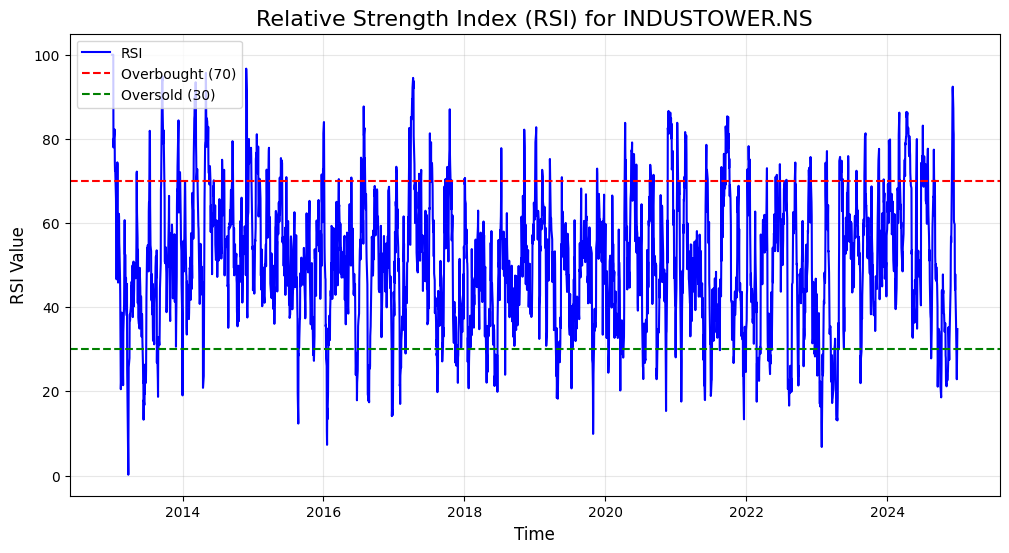

In [ ]:
# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(rsi, label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for INDUSTOWER.NS', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('RSI Value', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

### Key Insights:
- **Overbought Condition (RSI > 70, Red Line)**  
  - The stock may be **overvalued** and could experience a **price correction**.  
  - Possible **sell signal**.  

- **Oversold Condition (RSI < 30, Green Line)**  
  - The stock may be **undervalued**, with potential for a **price increase**.  
  - Possible **buy signal**.  

### General Observations:
- The RSI shows **high volatility**, frequently crossing the 30 and 70 thresholds.  
- The stock exhibits **strong momentum shifts**, indicating unstable trends.


## Volume Weighted Average Price (VWAP)

VWAP, or **Volume Weighted Average Price**, is a trading indicator used in the stock market to determine the average price of a security over a specific period, weighted by the volume traded at each price level. It helps traders understand the true average price of an asset throughout the trading day, factoring in both price and volume, which gives a better indication of market trends and fair value.

VWAP is often used by institutional investors to make large trades without impacting the market too much. It is also used by day traders to gauge the trend of a stock, determining whether the price is over or under the VWAP, which can signal buying or selling opportunities.

**How VWAP Works:**
- At every time interval (e.g., minute), VWAP is recalculated.
- It provides an average price weighted by trading volume, meaning trades that occur with higher volume have more influence on the VWAP calculation than those with lower volume.
- VWAP can help to confirm the trend direction, whether the price is above or below the VWAP.

#### Formula for VWAP:
To calculate VWAP, you need the following components for each time period:
- **Price (P):** The typical price for the period, typically calculated as ${Price} = \frac{\text{High} + \text{Low} + \text{Close}}{3}$.
- **Volume (V):** The trading volume for the period.

The formula for VWAP is:

$
VWAP = \frac{\sum_{i=1}^{n} P_i \times V_i}{\sum_{i=1}^{n} V_i}
$

Where:
- $P_i$ is the typical price of the $i$-th period.
- $V_i$ is the volume for the $i$-th period.
- $n$ is the number of periods.


In [ ]:
# Calculate Typical Price (TP)
df['Typical Price'] = (df[('High', 'INDUSTOWER.NS')] + df[('Low', 'INDUSTOWER.NS')] + df[('Close', 'INDUSTOWER.NS')]) / 3

# Calculate the VWAP
df['VWAP'] = (df['Typical Price'] * df[('Volume', 'INDUSTOWER.NS')]).cumsum() / df[('Volume', 'INDUSTOWER.NS')].cumsum()

# Generate Trading Signals (Buy if Adj Close > VWAP, Sell if Adj Close < VWAP)
df['Signal'] = np.where(df[('Adj Close', 'INDUSTOWER.NS')] > df['VWAP'], 'Buy', 'Sell')

# Apply a Rolling Average for Smoothing
window_size = 3  # You can adjust this window size
df['Adj Close'] = df[('Adj Close', 'INDUSTOWER.NS')].rolling(window=window_size).mean()


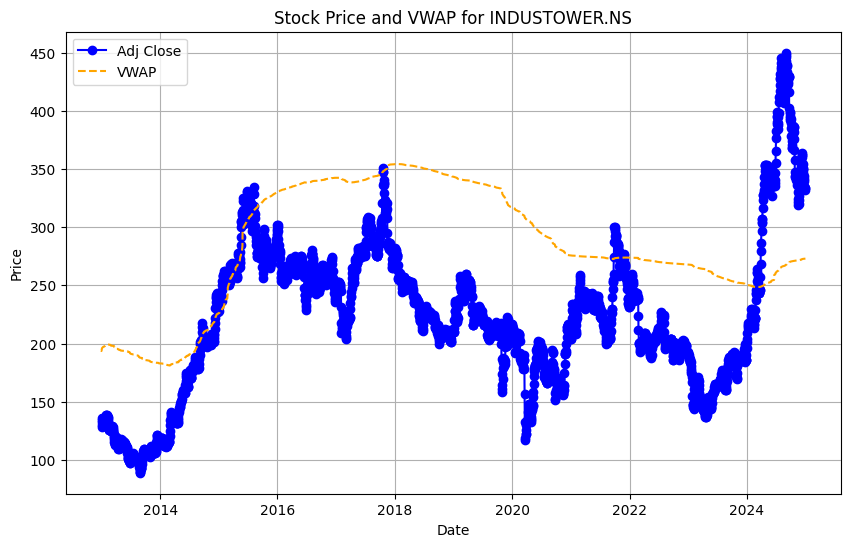

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue', linestyle='-', marker='o')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange', linestyle='--')
plt.title('Stock Price and VWAP for INDUSTOWER.NS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

# Show plot
plt.show()

### Key Insights:
### 1. VWAP as a Trend Indicator  
- **Stock price above VWAP → Bullish trend** (Stock is trading at a premium).  
- **Stock price below VWAP → Bearish trend** (Stock is trading at a discount).  

### 2. Stock Price Movements Relative to VWAP  
- **2013-2016:** Price moved **above VWAP**, indicating strong bullish momentum.  
- **2018-2023:** Price mostly stayed **below VWAP**, signaling a weaker trend.  
- **2024:** Sharp **price spike above VWAP**, suggesting strong buying pressure.  

### 3. Trading Signals from VWAP  
- **Buy Signal:** When the stock price crosses **above** VWAP.  
- **Sell Signal:** When the stock price falls **below** VWAP.


In [ ]:

# Display the DataFrame with signals
print(df[['Adj Close', 'VWAP', 'Signal']].tail(10))

Price          Adj Close        VWAP Signal
Ticker     INDUSTOWER.NS                   
Date                                       
2024-12-16    348.950002  272.670029    Buy
2024-12-17    349.616669  272.720595    Buy
2024-12-18    346.533335  272.733730    Buy
2024-12-19    344.333333  272.774722    Buy
2024-12-20    341.416667  272.803827    Buy
2024-12-23    339.500000  272.819471    Buy
2024-12-24    335.216665  272.839250    Buy
2024-12-26    333.633331  272.861620    Buy
2024-12-27    331.816661  272.876140    Buy
2024-12-30    333.983327  272.945040    Buy


# **VWAP Signal Interpretation for INDUSTOWER.NS**

## **1. Key Observations**
- **Consistent "Buy" Signals:**  
  - Every trading day from **December 16 to December 30, 2024**, generated a **Buy signal**.  
  - This suggests strong **institutional buying interest**.  

- **Price Decline vs. VWAP Increase:**  
  - Stock price dropped from **348.95 to 333.98**, yet VWAP **gradually increased** from **272.67 to 272.94**.  
  - This indicates **buyers are stepping in**, preventing a sharp downtrend.  

## **2. Interpretation of Buy Signals**
✅ **Bullish Sentiment:** The stock consistently trades **above VWAP**, signaling strength.  
✅ **Accumulation Phase:** Institutional investors may be **accumulating shares**, expecting a future price rise.  
✅ **Potential for Reversal:** Despite the price decline, persistent buy signals suggest **a possible rebound**.  

## **3. Trading Strategy Considerations**
🔹 **Trend Confirmation:** If the price stays **above VWAP**, the uptrend remains intact.  
🔹 **Volume Analysis:** Increased buying volume could lead to a **price bounce**.  
🔹 **Support & Resistance:**  
   - **VWAP (~272.9) acts as a support level**.  
   - A break **below VWAP** could turn the trend bearish.  

# **Conclusion**

*   Based on our analysis of Indus Towers (INDUSTOWER.NS), it is evident that
the company has demonstrated strong financial performance and resilience within the competitive telecommunications infrastructure sector. The stock price has shown significant growth over the past year, with a 52-week range of ₹206.35 to ₹460.35 and a market capitalization of ₹990.79 billion. Financially, Indus Towers achieved a 0.77% increase in revenue and a remarkable 195.89% growth in net income for the fiscal year 2023, indicating solid operational efficiency and growth potential. The stock's solid ownership by key institutional investors, including a significant portion held by promoters (50%) and foreign portfolio investors (26.15%), further reinforces its credibility in the market.

*   Investors should consider both the positive financial outlook and the external challenges that could impact the company's growth trajectory, such as increasing competition and operational costs within the telecommunications sector. Additionally, market conditions and strategic corporate decisions (e.g., stake changes by major shareholders) will be crucial factors in determining the future stock performance.

### References:
- [Stock Analysis](https://stockanalysis.com/quote/nse/INDUSTOWER/?utm_source=chatgpt.com)
- [5paisa](https://www.5paisa.com/stocks/industower-share-price?utm_source=chatgpt.com)
- [Investing View](https://investingview.in/indus-tower-share-price-latest-updates-analysis-and-insights/?utm_source=chatgpt.com)
